# Example Showing How To Enumerate Stereoisomers of Esters
Takes inputs of monomers and searches for a backbone consisting of a carboxylic acid and an alcohol. Then walks the backbone, creating S/R enantiomers for any stereosites along the way.

This code does not create diastereomers--it only modifies one stereosite at a time and wipes it when it is done.

-------
### **!!! Assumes there is only one acid and one aliphatic alcohol in the molecule !!!**

-------

## Imports and Utility Function Definitions

In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
from m2p import PolyMaker, Monomer

pm = PolyMaker()

def mfs(smi):
    return Chem.MolFromSmiles(smi)

def flatten(l):
    flat_l = []
    for sublist in l:
        # Don't flatten single strings
        if isinstance(sublist, str):
            flat_l.append(sublist)
        else:
            for item in sublist:
                flat_l.append(item)
    
    return flat_l

## Generate Enantiomers of Monomer

In [7]:
smi = "O=C(O)C(C)CC(CC(C))CO"
monomer = Monomer(smi)
enant_smi = monomer.esterification_enantiomers
print(enant_smi)

[('CCCC(CO)C[C@H](C)C(=O)O', 'CCCC(CO)C[C@@H](C)C(=O)O'), ('CCC[C@@H](CO)CC(C)C(=O)O', 'CCC[C@H](CO)CC(C)C(=O)O')]


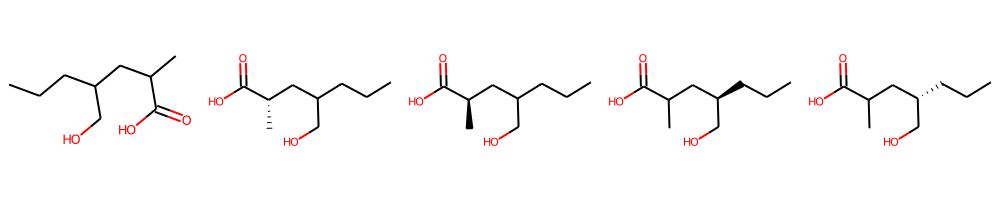

In [8]:

# Plot mols
mols = [mfs(s) for s in flatten([smi] + enant_smi)]
Chem.Draw.MolsToImage(mols)